In [1]:
# %matplotlib widget
# %load_ext autoreload
# %autoreload
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.animation
import yaml
import cv2
from scipy.spatial.transform import Rotation
from matplotlib.patches import Rectangle
from tqdm import tqdm


sys.path.append('/local_code/hpe-core/datasets/')

from vicon_processing.src.projection import ProjectionHelper
from vicon_processing.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_processing.src import vis_utils, utils

In [2]:
# import the DVS data
dvs_file_path = '/hpe/Users/Stefano/hpe/vicon/side_f1/atis-d/'
dvs_helper = DvsHelper(dvs_file_path)

no manual zero time found, using zero instead


In [3]:
dvs_helper.read_points_labels('../scripts/config/side_labels.yml');
labels_times = np.array(dvs_helper.labeled_points['times'])[[1, 3, 4]]
print(labels_times)
# labels_times = [0.0]

[0.375 0.65  0.925 1.2  ]


In [4]:
dvs_helper.labeled_points

{'points': [{'P3:HEDO': {'x': 526, 'y': 140},
   'P3:LFOO': {'x': 595, 'y': 592},
   'P3:RFOO': {'x': 453, 'y': 581},
   'P3:RHNO': {'x': 426, 'y': 287}},
  {'P3:HEDO': {'x': 570, 'y': 157},
   'P3:LFOO': {'x': 596, 'y': 599},
   'P3:RFOO': {'x': 503, 'y': 600},
   'P3:RHNO': {'x': 456, 'y': 300}},
  {'P3:HEDO': {'x': 746, 'y': 178},
   'P3:LFOO': {'x': 797, 'y': 370},
   'P3:RFOO': {'x': 674, 'y': 637},
   'P3:RHNO': {'x': 771, 'y': 644}},
  {'P3:HEDO': {'x': 832, 'y': 192},
   'P3:LFOO': {'x': 875, 'y': 643},
   'P3:RFOO': {'x': 774, 'y': 650},
   'P3:RHNO': {'x': 747, 'y': 425}},
  {'P3:HEDO': {'x': 565, 'y': 157},
   'P3:LFOO': {'x': 604, 'y': 602},
   'P3:RFOO': {'x': 434, 'y': 604},
   'P3:RHNO': {'x': 443, 'y': 375}}],
 'times': [0.1, 0.375, 0.6499999999999999, 0.9249999999999999, 1.2]}

In [5]:
labels = list(dvs_helper.labeled_points['points'][0].keys())
print(labels)

['P3:HEDO', 'P3:LFOO', 'P3:RFOO', 'P3:RHNO']


In [6]:
# load c3d vicon data
c3d_file_path = '/hpe/Users/Stefano/hpe/vicon/side_f1.c3d'
c3d_helper = C3dHelper(c3d_file_path, delay=-0.2)
print(c3d_helper.reader.point_labels)

['camera:cam_right              ' 'camera:cam_back               '
 'camera:cam_left               ' 'P3:PELO                       '
 'P3:PELA                       ' 'P3:PELL                       '
 'P3:PELP                       ' 'P3:LFEO                       '
 'P3:LFEA                       ' 'P3:LFEL                       '
 'P3:LFEP                       ' 'P3:LTIO                       '
 'P3:LTIA                       ' 'P3:LTIL                       '
 'P3:LTIP                       ' 'P3:LFOO                       '
 'P3:LFOA                       ' 'P3:LFOL                       '
 'P3:LFOP                       ' 'P3:LTOO                       '
 'P3:LTOA                       ' 'P3:LTOL                       '
 'P3:LTOP                       ' 'P3:RFEO                       '
 'P3:RFEA                       ' 'P3:RFEL                       '
 'P3:RFEP                       ' 'P3:RTIO                       '
 'P3:RTIA                       ' 'P3:RTIL                    

/usr/local/lib/python3.10/dist-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


In [7]:
c3d_helper.reader.frame_count

1711

In [8]:
# labels_times = [8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
vicon_labeled_frames = c3d_helper.get_frame_time(labels_times)
print(c3d_helper.frame_times)
vicon_points = c3d_helper.get_vicon_points(vicon_labeled_frames, labels)
vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)
# vicon_points_mark = vicon_points
print(vicon_labeled_frames)

[ 0.2         0.21000585  0.2200117  ... 17.2899883  17.29999415
 17.31      ]
[18, 45, 73, 100]


In [9]:
c3d_helper.get_vicon_points(vicon_labeled_frames, labels)

{'points': [{'P3:HEDO': array([ 843.2978,  886.2378, 1532.4237], dtype=float32),
   'P3:LFOO': array([717.5667 , 700.85876,  52.1464 ], dtype=float32),
   'P3:RFOO': array([ 724.959   , 1120.4396  ,   78.407646], dtype=float32),
   'P3:RHNO': array([ 433.90393, 1203.792  , 1083.4019 ], dtype=float32)},
  {'P3:HEDO': array([ 833.7297,  881.5806, 1553.4543], dtype=float32),
   'P3:LFOO': array([718.76654, 699.6409 ,  52.81089], dtype=float32),
   'P3:RFOO': array([ 726.37976 , 1120.3887  ,   78.732475], dtype=float32),
   'P3:RHNO': array([ 435.0917, 1186.7195, 1089.2675], dtype=float32)},
  {'P3:HEDO': array([ 832.0571 ,  876.88715, 1558.2435 ], dtype=float32),
   'P3:LFOO': array([719.42126, 699.5718 ,  51.62439], dtype=float32),
   'P3:RFOO': array([ 724.5911 , 1120.6676 ,   77.83396], dtype=float32),
   'P3:RHNO': array([ 439.22104, 1188.571  , 1050.635  ], dtype=float32)},
  {'P3:HEDO': array([ 816.185  ,  864.88086, 1589.4934 ], dtype=float32),
   'P3:LFOO': array([716.7702  , 696.

In [10]:
c3d_helper.markers_T

{18: array([[ 5.01558818e-01,  1.80509648e-01,  8.46082148e-01,
          5.15107912e+02],
        [-4.70503043e-01, -7.63792652e-01,  4.41868347e-01,
         -1.24730969e+03],
        [ 7.25992901e-01, -6.19707236e-01, -2.98156636e-01,
          3.25049768e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 45: array([[ 5.02427627e-01,  1.80366887e-01,  8.45596997e-01,
          5.18077266e+02],
        [-4.68044597e-01, -7.65574355e-01,  4.41395642e-01,
         -1.23662880e+03],
        [ 7.26980520e-01, -6.17546468e-01, -3.00225959e-01,
          3.25385948e+03],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 73: array([[ 4.72133213e-01,  2.25386618e-01,  8.52227133e-01,
          3.56428605e+02],
        [-4.14543735e-01, -7.96430061e-01,  4.40286999e-01,
         -1.02231859e+03],
        [ 7.77974087e-01, -5.61159550e-01, -2.82588467e-01,
          3.36458067e+03],
        [ 0.00000000e+00,  

In [11]:
print(f"times from dvs labels: {dvs_helper.labeled_points['times']}")
print(f"times from vicon labels: {vicon_points_mark['times']}")

times from dvs labels: [0.1, 0.375, 0.6499999999999999, 0.9249999999999999, 1.2]
times from vicon labels: [0.38010526 0.65026316 0.9304269  1.2005848 ]


In [12]:
dvs_helper.labeled_points

{'points': [{'P3:HEDO': {'x': 526, 'y': 140},
   'P3:LFOO': {'x': 595, 'y': 592},
   'P3:RFOO': {'x': 453, 'y': 581},
   'P3:RHNO': {'x': 426, 'y': 287}},
  {'P3:HEDO': {'x': 570, 'y': 157},
   'P3:LFOO': {'x': 596, 'y': 599},
   'P3:RFOO': {'x': 503, 'y': 600},
   'P3:RHNO': {'x': 456, 'y': 300}},
  {'P3:HEDO': {'x': 746, 'y': 178},
   'P3:LFOO': {'x': 797, 'y': 370},
   'P3:RFOO': {'x': 674, 'y': 637},
   'P3:RHNO': {'x': 771, 'y': 644}},
  {'P3:HEDO': {'x': 832, 'y': 192},
   'P3:LFOO': {'x': 875, 'y': 643},
   'P3:RFOO': {'x': 774, 'y': 650},
   'P3:RHNO': {'x': 747, 'y': 425}},
  {'P3:HEDO': {'x': 565, 'y': 157},
   'P3:LFOO': {'x': 604, 'y': 602},
   'P3:RFOO': {'x': 434, 'y': 604},
   'P3:RHNO': {'x': 443, 'y': 375}}],
 'times': [0.1, 0.375, 0.6499999999999999, 0.9249999999999999, 1.2]}

In [13]:
vicon_points_mark

{'points': [{'P3:HEDO': array([ 2.39460217e+03, -1.64385625e+03,  2.85661562e+03,  1.00000000e+00]),
   'P3:LFOO': array([ 1.04564173e+03, -2.09719594e+03,  3.32157097e+03,  1.00000000e+00]),
   'P3:RFOO': array([ 1.14730695e+03, -2.40954275e+03,  3.05909048e+03,  1.00000000e+00]),
   'P3:RHNO': array([ 1.86667929e+03, -1.89218930e+03,  2.49648679e+03,  1.00000000e+00])},
  {'P3:HEDO': array([ 2.40957037e+03, -1.61607901e+03,  2.84916039e+03,  1.00000000e+00]),
   'P3:LFOO': array([ 1.05005422e+03, -2.08536025e+03,  3.32847277e+03,  1.00000000e+00]),
   'P3:RFOO': array([ 1.15168749e+03, -2.39959558e+03,  3.06639382e+03,  1.00000000e+00]),
   'P3:RHNO': array([ 1.87180555e+03, -1.86799521e+03,  2.51028188e+03,  1.00000000e+00])},
  {'P3:HEDO': array([ 2.27488645e+03, -1.37954757e+03,  3.07948431e+03,  1.00000000e+00]),
   'P3:LFOO': array([ 8.97761101e+02, -1.85498061e+03,  3.51711193e+03,  1.00000000e+00]),
   'P3:RFOO': array([ 1.01744784e+03, -2.18095738e+03,  3.27742548e+03,  1.000

In [14]:
proj_helper = ProjectionHelper(vicon_points_mark, dvs_helper.labeled_points)
proj_helper.import_camera_calbration('../scripts/config/temp_calib.txt');

Number of 3d points: 16
Number of image points: 16


In [15]:
np.set_printoptions(suppress=True)
print(proj_helper.image_points)

[[570. 157.   1.]
 [596. 599.   1.]
 [503. 600.   1.]
 [456. 300.   1.]
 [746. 178.   1.]
 [797. 370.   1.]
 [674. 637.   1.]
 [771. 644.   1.]
 [832. 192.   1.]
 [875. 643.   1.]
 [774. 650.   1.]
 [747. 425.   1.]
 [565. 157.   1.]
 [604. 602.   1.]
 [434. 604.   1.]
 [443. 375.   1.]]


In [16]:
# tmp = np.copy(proj_helper.world_points[:7])
# proj_helper.world_points[:7] = proj_helper.world_points[7:]
# proj_helper.world_points[7:] = tmp
# # proj_helper.world_points = np.flip(proj_helper.world_points, axis=0)

In [17]:
T = proj_helper.find_R_t()
# T = proj_helper.T_to_transform(T)
print(T)
# T[2, -1] = 0

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 3095.1074558311357
       x: [-3.290e-01  5.869e-01 -1.846e+00  1.000e+01  1.000e+01
            1.000e+01]
     nit: 59
     jac: [-2.275e+02  3.913e+02 -1.132e+02  6.876e-02 -1.395e-02
           -2.144e-01]
    nfev: 479
    njev: 59
[[-0.22625443  0.80133464  0.5537795   9.99999741]
 [-0.86215429 -0.42933046  0.26900805  9.99969093]
 [ 0.45331987 -0.41657911  0.78801202 10.        ]
 [ 0.          0.          0.          1.        ]]


In [18]:
# T = np.load('../scripts/data/extrinsic.npy')
# np.save("../scripts/extrinsic.npy", T)

In [19]:
print(Rotation.from_matrix(T[:3, :3]).as_euler('xyz'))
print(T[:3, :3])
print(f"translation in new frame: {T[:-1, -1]}")
print(f"translation in world: {np.linalg.inv(T[:3, :3]) @ T[:-1, -1]}")

[-0.48630063 -0.47048638 -1.82743838]
[[-0.22625443  0.80133464  0.5537795 ]
 [-0.86215429 -0.42933046  0.26900805]
 [ 0.45331987 -0.41657911  0.78801202]]
translation in new frame: [ 9.99999741  9.99969093 10.        ]
translation in world: [-6.35062142 -0.44561872 16.10791105]


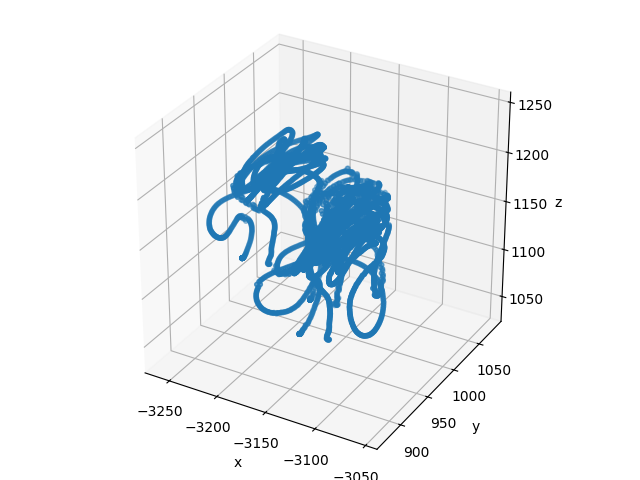

In [115]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

zero_Tr = np.eye(4)
c3d_helper.marker_T_at_frame_vector(1)
# marker_T0 = np.zeros((4, 4))
# marker_T0[:3, :3] = Rotation.from_euler('xyz', [np.pi/2, 0, 0]).as_matrix()
# marker_T0[:-1, -1] = [0, 0, 550]
# # marker_T0[:-1, -1] = Rotation.from_euler('xyz', [-np.pi/2, 0, 0]).as_matrix() @ marker_T0[:-1, -1]
# marker_T0[-1, -1] = 1
# print(marker_T0)

labels = [
        'camera:cam_back',
        'camera:cam_right',
        'camera:cam_left'
        ]
vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            c3d_helper.points_dict_to_array(c3d_helper.get_vicon_points(np.arange(1, c3d_helper.reader.frame_count-1), labels)), zero_Tr))

# for i in range(len(vicon_labeled_frames)):
#     marker_T = np.linalg.inv(c3d_helper.markers_T[vicon_labeled_frames[i]])
#     print(Rotation.from_matrix(marker_T[:3, :3]).as_euler('xyz'))
#     vis_utils.plot_points_3d(ax,
#                             proj_helper.transform_points(
#                                 proj_helper.world_points[i*7:(1+i)*7],
#                                 zero_Tr
#                             )
#     )
#     vis_utils.plot_points_3d(ax,
#                             proj_helper.transform_points(
#                                 proj_helper.world_points[i*7:(1+i)*7],
#                                 marker_T
#                             )
#     )

# vis_utils.plot_frame(ax, zero_Tr)

# for Tr in c3d_helper.markers_T.values():
#     vis_utils.plot_frame(ax, np.linalg.inv(Tr))
#     vis_utils.plot_frame(ax, np.linalg.inv(Tr) @ np.linalg.inv(T))

vis_utils.set_axes_equal(ax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()

plt.show()

In [20]:
labels_times

array([0.375, 0.65 , 0.925, 1.2  ])

In [21]:
plt.close()
plt.clf()

<Figure size 640x480 with 0 Axes>

In [22]:
# proj_helper.undistort_image_points()
print(proj_helper.K)

[[1208.91     0.     651.117]
 [   0.    1207.09   332.922]
 [   0.       0.       1.   ]]


In [31]:
projected_points = proj_helper.project_to_frame(
    proj_helper.transform_points(
        proj_helper.world_points, T
        )
    )

projected_points = proj_helper.project_to_frame(
    proj_helper.world_points
    )

In [32]:
proj_helper.world_points

array([[ 2394.60216761, -1643.85624979,  2856.61561675,     1.        ],
       [ 1045.64173076, -2097.19594086,  3321.570973  ,     1.        ],
       [ 1147.30694608, -2409.54275439,  3059.09048142,     1.        ],
       [ 1866.67929205, -1892.18929955,  2496.48678988,     1.        ],
       [ 2409.57037135, -1616.07901047,  2849.16038949,     1.        ],
       [ 1050.05422052, -2085.36025106,  3328.4727677 ,     1.        ],
       [ 1151.68748773, -2399.59558383,  3066.393816  ,     1.        ],
       [ 1871.80554789, -1867.99521462,  2510.28188286,     1.        ],
       [ 2274.88645486, -1379.54757177,  3079.48430628,     1.        ],
       [  897.76110103, -1854.98061051,  3517.11192913,     1.        ],
       [ 1017.44783634, -2180.95738382,  3277.42548037,     1.        ],
       [ 1727.06711549, -1688.42769074,  2742.40792506,     1.        ],
       [ 2058.07648049,  -941.34940367,  3376.11727711,     1.        ],
       [  636.16709263, -1397.87545196,  3787.28487

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


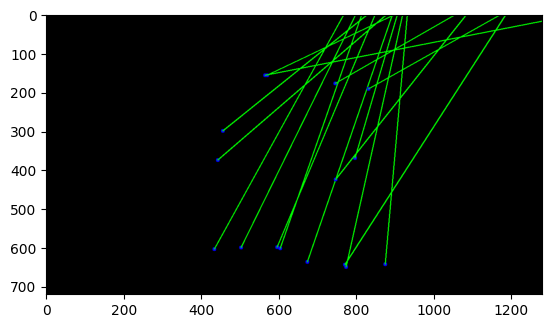

In [33]:
%matplotlib inline
plt.clf()
frame = np.zeros((720, 1280, 3))
frame = vis_utils.plot_2d_difference(frame, proj_helper.image_points, projected_points)
plt.imshow(frame)
plt.show()

0
(4, 3)
1
(4, 3)
2
(4, 3)
3
(4, 3)


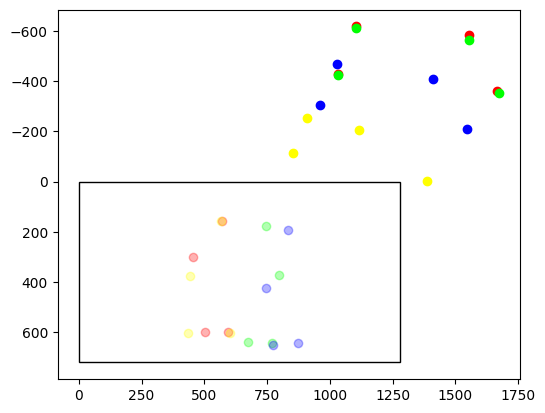

In [34]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes()

s = 4
colors = [
    (1.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 0.0, 1.0),
    (1.0, 1.0, 0.0),
    (1.0, 0.0, 1.0),
    (0.0, 1.0, 1.0),
    (1.0, 1.0, 1.0),
    (1.0, 1.0, 1.0)
]
for i, t in enumerate(labels_times):
    print(i)
    vis_utils.plot_2d_points_plt(ax, projected_points[s*i:s*(i+1)], color=colors[i])
    print(projected_points[s*i:s*(i+1)].shape)

    alpha = 0.3
    vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[s*i:s*(i+1)], color=colors[i], alpha=alpha)

ax.add_patch(Rectangle((0, 0), 1280, 720, fill=False))

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(min(0, xlim[0]), max(1280, xlim[1]))
ax.set_ylim(min(0, ylim[0]), max(720, ylim[1]))

ax.axes.set_aspect('equal')

plt.gca().invert_yaxis()

In [153]:
proj_helper.image_points

array([[526., 140.,   1.],
       [595., 592.,   1.],
       [453., 581.,   1.],
       [426., 287.,   1.],
       [570., 157.,   1.],
       [596., 599.,   1.],
       [503., 600.,   1.],
       [456., 300.,   1.],
       [746., 178.,   1.],
       [797., 370.,   1.],
       [674., 637.,   1.],
       [771., 644.,   1.]])

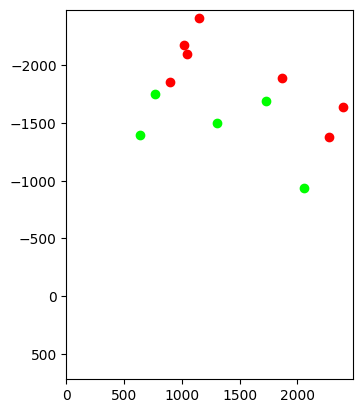

In [27]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes()

s = 7

vis_utils.plot_2d_points_plt(ax, proj_helper.world_points[:s, :2], color=(1.0, 0.0, 0.0))
vis_utils.plot_2d_points_plt(ax, proj_helper.world_points[s:s*2, :2], color=(0.0, 1.0, 0.0))


xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(min(0, xlim[0]), max(1280, xlim[1]))
ax.set_ylim(min(0, ylim[0]), max(720, ylim[1]))

ax.axes.set_aspect('equal')

plt.gca().invert_yaxis()

In [27]:
dvs_helper.read_events()

importIitYarp trying path: /hpe/Users/Stefano/hpe/vicon/side_f1/atis-d/


KeyboardInterrupt: 

In [ ]:
c3d_helper.find_start_time()

0.0

In [ ]:

def get_projected_points(frame_id):
    T_markers = c3d_helper.marker_T_at_frame_vector(frame_id)
    v_points = c3d_helper.get_points_frame(frame_id)
    v_points = v_points[:, :4]
    v_points[:, -1] = 1
    # rot = Rotation.from_matrix(T_markers[:3, :3]).as_rotvec()
    # t = T_markers[:-1, -1]

    # projected_points_cv2, _ = cv2.projectPoints(v_points[:, :-1].transpose(), rot, t, proj_helper.K, proj_helper.D)
    # projected_points_cv2 = projected_points_cv2[:, 0, :]

    projected_points = proj_helper.project_to_frame(
        proj_helper.transform_points(
            v_points, T @ T_markers
            )
        )
    
    return projected_points

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 30.0, (1280, 720))

for i in tqdm(range(int(1), int(c3d_helper.reader.frame_count), 3)):
    projected_points = get_projected_points(i);
    
    frame = np.ones((720, 1280, 3), dtype=np.uint8) * 100

    ts_start = c3d_helper.frame_times[i]
    frame = utils.extract_frame(dvs_helper.events, ts_start, ts_start + 0.01, (720, 1280, 3))

    frame = vis_utils.plot_2d_points(frame, projected_points)
    out.write(frame.astype(np.uint8))
out.release()

  0%|          | 0/481 [00:00<?, ?it/s]

 13%|█▎        | 64/481 [00:05<00:37, 11.18it/s]


KeyboardInterrupt: 

In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

xs = []
for i in tqdm(range(1, int(c3d_helper.reader.frame_count / 4), 3)):
    T = c3d_helper.marker_T_at_frame_vector(i)

    rot = Rotation.from_matrix(T[:3, :3])

    xs.append(rot.as_euler('xyz'))
    # vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)

  0%|          | 0/328 [00:00<?, ?it/s]

100%|██████████| 328/328 [00:14<00:00, 22.33it/s]


In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

start_frame = 500
end_frame = 3000
step = 2
n_frames = int((end_frame - start_frame) / step)

vicon_points = c3d_helper.get_vicon_points(np.arange(start_frame, end_frame, step), labels)
# vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)

camera_markers_points = c3d_helper.points_dict_to_array(vicon_points)
n_markers = int(camera_markers_points.shape[0] / n_frames)

frames_points = camera_markers_points.reshape(n_frames, n_markers, 4)[:, :, :3]

T_markers_list = []
for i in range(start_frame, end_frame, step):
    T_marker = c3d_helper.marker_T_at_frame_vector(i)

    X, Y, Z, U, V, W = vis_utils.XYZ_frame(T_marker)

    T_markers_list.append([X, Y, Z, U, V, W])


KeyboardInterrupt: 

In [ ]:
camera_markers_points.shape

(3750, 4)

(49, 4)


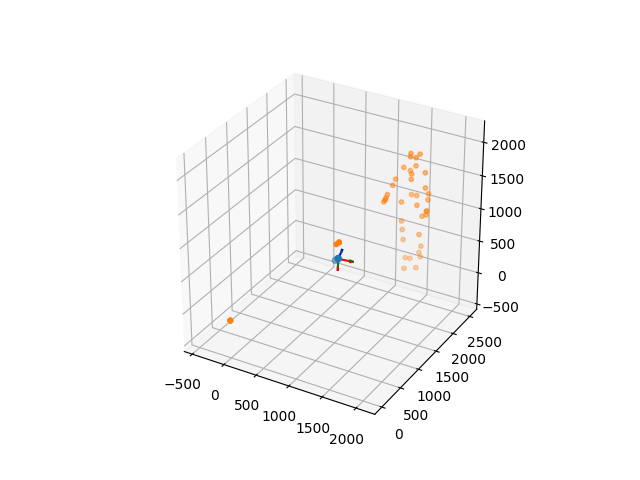

In [ ]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

skel = ax.scatter(frames_points[0][:, 0], frames_points[0][:, 1], frames_points[0][:, 2])

vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(vicon_labeled_frames[0])), zero_Tr))

T_marker = c3d_helper.marker_T_at_frame_vector(start_frame)
frame_plot = vis_utils.plot_frame(ax, np.linalg.inv(T_marker))

def quiver_data_to_segments(X, Y, Z, u, v, w, length=1):
    segments = (X, Y, Z, X+v*length, Y+u*length, Z+w*length)
    segments = np.array(segments).reshape(6,-1)
    return [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]

def update(n):
    skel._offsets3d = (frames_points[n][:, 0], frames_points[n][:, 1], frames_points[n][:, 2])
    # points._offsets3d = (sub_frames[n][:, 0], sub_frames[n][:, 1], sub_frames[n][:, 2])
    # X, Y, Z, U, V, W = T_markers_list[n]
    # segments = quiver_data_to_segments(X, Y, Z, U, V, W, length=5)
    # frame_plot.set_segments(segments)


# points = ax.scatter(sub_frames[0][:, 0], sub_frames[0][:, 1], sub_frames[0][:, 2], c='red', marker='^')
vis_utils.set_axes_equal(ax)

ani = matplotlib.animation.FuncAnimation(fig, update, range(n_frames), 
                               interval=200, blit=True)

plt.show()

In [ ]:
plt.close()

In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

start_frame = 500
end_frame = 3000
step = 1
n_frames = int((end_frame - start_frame) / step)
# samples_times = np.linspace(14.0, 15.0, 20)
# vicon_labeled_frames = c3d_helper.get_frame_time(samples_times)
vicon_points = c3d_helper.get_vicon_points(vicon_labeled_frames, labels)
camera_markers_points = c3d_helper.points_dict_to_array(vicon_points)


In [ ]:
vicon_labeled_frames

[1562, 1662]

1.0
1.0


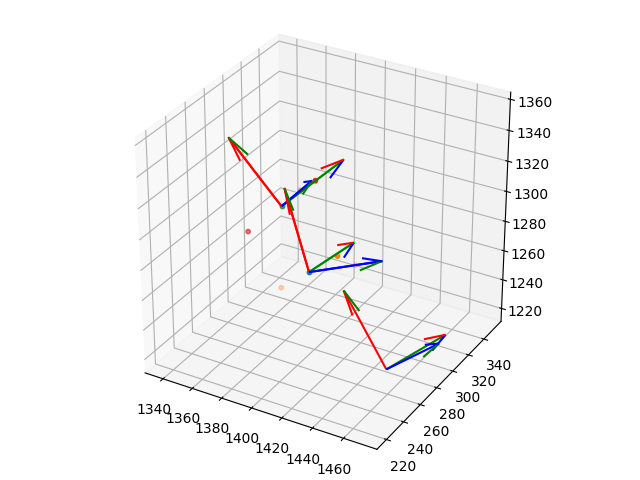

In [ ]:
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

zero_Tr = np.eye(4)

# vis_utils.plot_points_3d(ax, 
#         proj_helper.transform_points(
#             c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(vicon_labeled_frames[0])), zero_Tr))

n_frames = int(camera_markers_points.shape[0] / 3)

# for i in range(n_frames):
#     vis_utils.plot_points_3d(ax, 
#         camera_markers_points.reshape(n_frames, 3, 4)[i, :, :-1]
#     )

colors = [
    (1.0, 0.0, 0.0),
    (0.0, 1.0, 0.0),
    (0.0, 0.0, 1.0)
]

prev_mid = [0.0, 0.0, 0.0]
for i, ps in enumerate(vicon_points['points']):
    camera_front = ps['event_camera:front'][:3]
    camera_side = ps['event_camera:side'][:3]
    camera_top = ps['event_camera:top'][:3]

    side_top_mid = (camera_side + camera_top) / 2
    vis_utils.plot_points_3d(ax, np.array([side_top_mid]))

    z = camera_front - side_top_mid
    z = z / np.linalg.norm(z)

    t = camera_top - side_top_mid
    t = t / np.linalg.norm(t)

    x = np.cross(t, z)
    x = x / np.linalg.norm(x)

    y = np.cross(z, x)
    y = y / np.linalg.norm(y)

    vectors = np.vstack((x, y, z))

    print(np.linalg.det(vectors))

    vectors = vectors * 50
    x = vectors[0]
    y = vectors[1]
    z = vectors[2]

    
#     ax.plot([camera_top[0], camera_front[0], camera_side[0]], 
#             [camera_top[1], camera_front[1], camera_side[1]], 
#             [camera_top[2], camera_front[2], camera_side[2]])
    
    # ax.plot_trisurf([camera_top[0], camera_front[0], camera_side[0]], 
    #     [camera_top[1], camera_front[1], camera_side[1]], 
    #     [camera_top[2], camera_front[2], camera_side[2]],
    #     color=colors[i])
    
    ax.plot([side_top_mid[0], side_top_mid[0] + z[0]],
            [side_top_mid[1], side_top_mid[1] + z[1]],
            [side_top_mid[2], side_top_mid[2] + z[2]], c=colors[2])
    
    ax.plot([side_top_mid[0], side_top_mid[0] + y[0]],
            [side_top_mid[1], side_top_mid[1] + y[1]],
            [side_top_mid[2], side_top_mid[2] + y[2]], c=colors[1])
    
    ax.plot([side_top_mid[0], side_top_mid[0] + x[0]],
            [side_top_mid[1], side_top_mid[1] + x[1]],
            [side_top_mid[2], side_top_mid[2] + x[2]], c=colors[0])


    side_top_mid = (camera_side + camera_top) / 2
    

#     tmp = camera_front + (camera_front - side_top_mid) * 5
#     ax.plot([side_top_mid[0], tmp[0]],
#             [side_top_mid[1], tmp[1]],
#             [side_top_mid[2], tmp[2]])
    
    camera_points = np.copy(camera_markers_points.reshape(n_frames, 3, 4))
    
    vis_utils.plot_points_3d(ax, 
        camera_points[i, :, :-1]
    )

for k in sorted(c3d_helper.markers_T.keys())[:]:
    Tr = np.copy(c3d_helper.markers_T[k])

#     # Tr[:3, :3] = T_0[:3, :3] @ Tr[:3, :3]
    vis_utils.plot_frame(ax, np.linalg.inv(Tr), arrow_length=50)
#     # vis_utils.plot_frame(ax, np.linalg.inv(Tr) @ np.linalg.inv(T))
#     print(Tr[:3, :3].transpose())

vis_utils.set_axes_equal(ax)
plt.tight_layout()

plt.show()



In [ ]:
plt.close()
plt.clf()

In [ ]:
labels = [
    'event_camera:front',
    'event_camera:side',
    'event_camera:top'
]

start_frame = 500
end_frame = 3000
step = 1
n_frames = int((end_frame - start_frame) / step)

vicon_points = c3d_helper.get_vicon_points(np.arange(start_frame,end_frame, step), labels)
camera_markers_points = c3d_helper.points_dict_to_array(vicon_points)


In [ ]:
distances = []
for i, ps in enumerate(vicon_points['points']):
    camera_front = ps['event_camera:front'][:3]
    camera_side = ps['event_camera:side'][:3]
    camera_top = ps['event_camera:top'][:3]

    t  = camera_top - camera_front
    distances.append(np.linalg.norm(t))

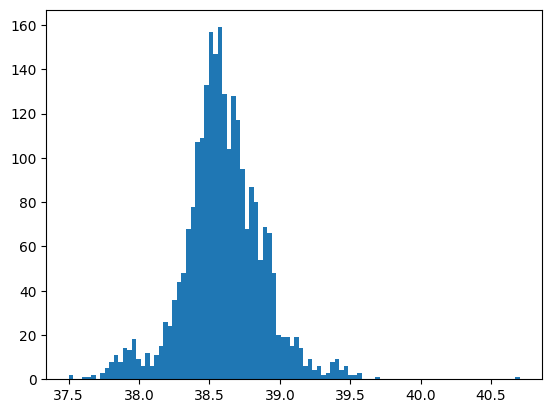

In [ ]:
%matplotlib inline
plt.clf()

distances = np.array(distances)
distances = distances[distances > 0.1]

plt.hist(distances, 100);
plt.show()

TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:
start_frame = 200
end_frame = 3500
step = 1
n_frames = int((end_frame - start_frame) / step)

rot_traj= np.zeros((n_frames, 3))
for i in tqdm(range(start_frame, end_frame, step)):
    T_marker = c3d_helper.marker_T_at_frame_vector(i)
    # T_m = np.linalg.inv(T_marker)
    # pos_traj[i - start_frame] = T_m[:-1, -1]

    rot = Rotation.from_matrix(T_marker[:3, :3]).as_euler('xyz')

    rot_traj[i - start_frame] = rot


  0%|          | 0/3300 [00:00<?, ?it/s]

 63%|██████▎   | 2078/3300 [03:53<03:58,  5.12it/s]/home/schiavazza/code/hpe/vicon_recordings/src/data_helpers.py:163: RuntimeWarning: invalid value encountered in divide
  t  = t / np.linalg.norm(t)
/home/schiavazza/code/hpe/vicon_recordings/src/data_helpers.py:166: RuntimeWarning: invalid value encountered in divide
  f = f / np.linalg.norm(f)
/tmp/ipykernel_31243/3012687754.py:12: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  rot = Rotation.from_matrix(T_marker[:3, :3]).as_euler('xyz')
 70%|███████   | 2322/3300 [04:48<03:41,  4.41it/s]

 70%|███████   | 2324/3300 [04:48<03:48,  4.27it/s]

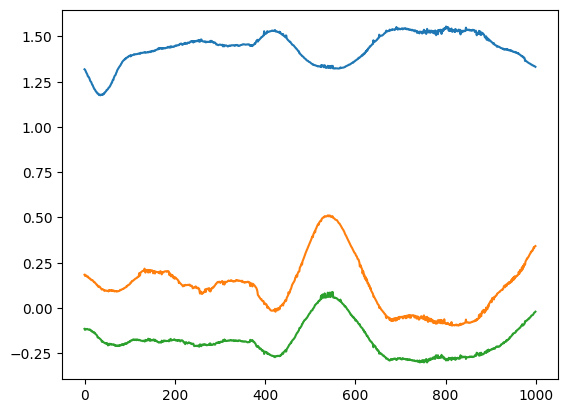

In [ ]:
plt.plot(rot_traj)

In [ ]:
camera_markers_points.shape

(7500, 4)

In [ ]:
pos_traj.shape

(2500, 3)

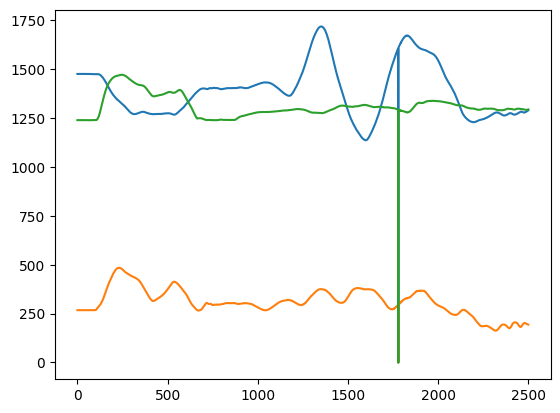

In [ ]:
plt.plot(camera_markers_points.reshape(2500, 3, 4)[:, 0, :-1])

In [26]:

labels = ['P3:RFOO']
points = c3d_helper.get_vicon_points(range(1, int(c3d_helper.reader.frame_count)), labels)

In [27]:
points

{'points': [{'P3:RFOO': array([ 725.02814, 1120.5168 ,   78.58247], dtype=float32)},
  {'P3:RFOO': array([ 725.0567 , 1120.5159 ,   78.57121], dtype=float32)},
  {'P3:RFOO': array([ 725.0998  , 1120.4935  ,   78.555595], dtype=float32)},
  {'P3:RFOO': array([ 725.10284, 1120.4318 ,   78.57215], dtype=float32)},
  {'P3:RFOO': array([ 725.1308 , 1120.4193 ,   78.57676], dtype=float32)},
  {'P3:RFOO': array([ 725.1562 , 1120.4742 ,   78.59119], dtype=float32)},
  {'P3:RFOO': array([ 725.1492 , 1120.4882 ,   78.59536], dtype=float32)},
  {'P3:RFOO': array([ 725.11914 , 1120.491   ,   78.600075], dtype=float32)},
  {'P3:RFOO': array([ 725.07697, 1120.4423 ,   78.59255], dtype=float32)},
  {'P3:RFOO': array([ 725.0624  , 1120.4817  ,   78.588005], dtype=float32)},
  {'P3:RFOO': array([ 725.04816 , 1120.5332  ,   78.556114], dtype=float32)},
  {'P3:RFOO': array([ 724.97614, 1120.532  ,   78.53561], dtype=float32)},
  {'P3:RFOO': array([ 724.9403 , 1120.5242 ,   78.50039], dtype=float32)},
  {

In [28]:
p_hist = []
for p in points['points']:
    print(list(p.values())[0])
    p_hist.append(list(p.values())[0])

[ 725.02814 1120.5168    78.58247]
[ 725.0567  1120.5159    78.57121]
[ 725.0998   1120.4935     78.555595]
[ 725.10284 1120.4318    78.57215]
[ 725.1308  1120.4193    78.57676]
[ 725.1562  1120.4742    78.59119]
[ 725.1492  1120.4882    78.59536]
[ 725.11914  1120.491      78.600075]
[ 725.07697 1120.4423    78.59255]
[ 725.0624   1120.4817     78.588005]
[ 725.04816  1120.5332     78.556114]
[ 724.97614 1120.532     78.53561]
[ 724.9403  1120.5242    78.50039]
[ 724.93024 1120.5092    78.51274]
[ 724.8895  1120.4834    78.45356]
[ 724.9139  1120.4542    78.44946]
[ 724.92773  1120.4554     78.428894]
[ 724.959    1120.4396     78.407646]
[ 724.9666   1120.4644     78.408295]
[ 725.0361  1120.4022    78.43887]
[ 725.125   1120.3951    78.42237]
[ 725.1724  1120.4272    78.45473]
[ 725.2418   1120.3807     78.449104]
[ 725.342    1120.3899     78.453445]
[ 725.3537  1120.3531    78.45525]
[ 725.4165  1120.3113    78.47057]
[ 725.49084 1120.2892    78.48302]
[ 725.5203  1120.2759    78.

In [29]:
p_hist = np.array(p_hist)

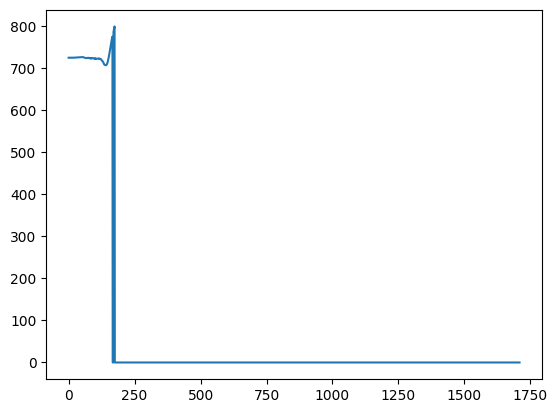

In [30]:
plt.plot(p_hist[:, 0])